In [11]:
import numpy as np
a = 300
b = 1
x_0 = 1.5
n = 1000
N = 5#int(np.ceil(1 + 3.322*np.log10(n)))

In [15]:
def ricker(n : int, x_0: int, a : int, b : int):
    x = x_0
    for _ in range(0, n+1):
        yield x
        x = a*x*np.exp(-b*x)

In [16]:
space = np.linspace(0, n, n+1)
x = np.fromiter(ricker(n, x_0, a, b), float)

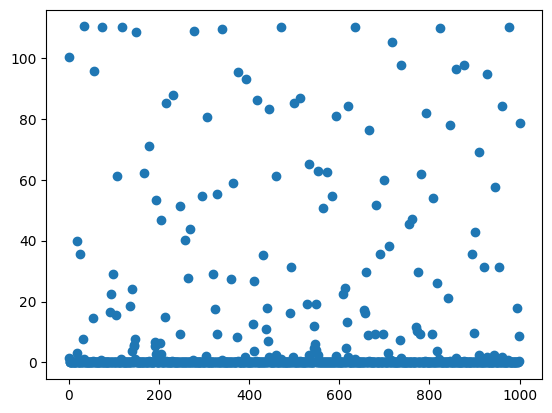

In [17]:
import matplotlib.pyplot as plt
ax = plt.subplot(1,1,1)
ax.scatter(space, x)

In [18]:
avg = np.average(x)
avg_sq = np.average(x**2)
avg_ln = np.average(np.log(x))
avg_nln = np.average(x * np.log(x))
print(abs(b-2*(avg_nln - avg*avg_ln)/(avg_sq - avg**2)))
print(abs(a - np.exp(b*avg)))

0.0020562105448055368
21.446362358315184


In [6]:
def calc_params():
    sp = np.linspace(1, n + 1, n+1)
    x_a = np.cumsum(x) / sp
    x_a_sq = np.cumsum(x**2) / sp
    x_a_ln = np.cumsum(np.log(x)) / sp
    x_a_nln = np.cumsum(x*np.log(x)) / sp
    D = 1/48
    E_ps = np.random.normal(1, np.sqrt(D), n + 1)
    y = x * E_ps
    y_a = np.cumsum(y) / sp
    y_a_sq = np.cumsum(y**2) / sp
    y_a_ln = np.cumsum(np.log(y)) / sp
    y_a_nln = np.cumsum(y * np.log(y)) / sp
    
    B_n = 2*(x_a_nln - x_a*x_a_ln)/(x_a_sq - x_a**2 + 0.000001)
    B_yn = 2*np.exp(D/2)*(y_a_nln - D*y_a - y_a*y_a_ln)/(y_a_sq * np.exp(-D) - y_a**2)
    A_n = np.exp(B_n*x_a)
    A_yn = np.exp(B_yn*y_a*np.exp(-D/2))
    
    return A_n, A_yn, B_n, B_yn

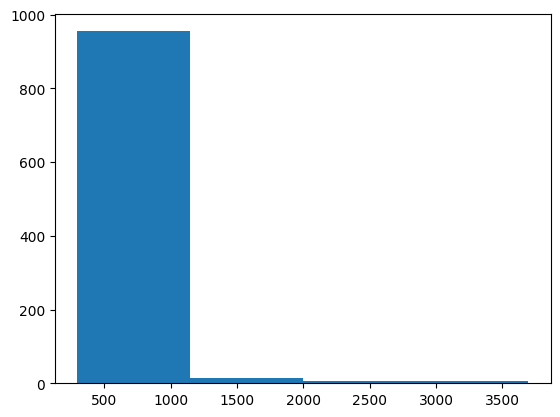

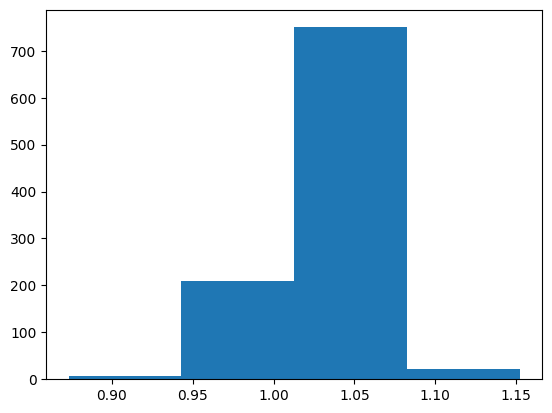

In [7]:
#bins = [2.89963,2.94201,2.98438,3.02676,3.06914,3.11151]

A_n, A_yn, B_n, B_yn = calc_params()
offset = 30
bins = np.linspace(min(A_yn[offset:]),max(A_yn[offset:]),N)
ax1 = plt.hist(A_yn, bins = bins)
plt.show()
bins = np.linspace(min(B_yn[offset:]),max(B_yn[offset:]),N)
ax2 = plt.hist(B_yn, bins = bins)
plt.show()